In [1]:
import numpy as np
from sys import exit
from LibPython.Library import DiffEq

In [10]:
def underdamped(t, y, paramlist):
    g = tuple(y)[0]
    I, Ic0, Q = tuple(paramlist)
    dg = Q*(I/Ic0 - np.sin(g))
    return np.array(dg)

def junction(t, y, paramlist):
    dg, g = tuple(y)
    I, Ic0, Q = tuple(paramlist)
    dg = dg
    ddg = I/Ic0 - (1/Q)*dg - np.sin(g)
    return np.array([ddg, dg])

def noisy(t, y, paramlist):
    rand = np.random.normal(scale=0.2)
    dg, g = tuple(y)
    I, Ic0, Q = tuple(paramlist)
    dg = dg
    ddg = I/Ic0 - (1/Q)*dg - np.sin(g) + rand*I
    return np.array([ddg, dg])   

In [28]:
tlist = np.arange(0, 100, 0.1)
paramlist = [1, 0.8, 1e-2]
d = DiffEq(underdamped, tlist, [0.0, 0.0], paramlist)

In [29]:
y = d.runge_kutta()
np.shape(y[:, 0])

(1001,)

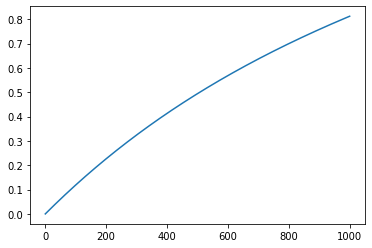

In [30]:
plt.plot(y[:, 0])

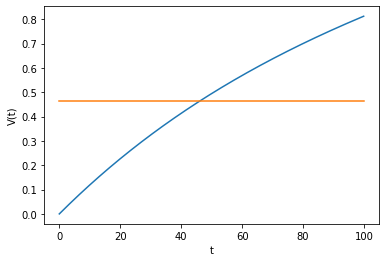

In [31]:
from matplotlib import pyplot as plt
plt.plot(tlist, y[:-1, 0])
plt.plot(tlist, np.ones_like(tlist)*np.average(y[:, 0]))
plt.xlabel("t")
plt.ylabel("V(t)")
plt.show()

In [6]:
start, stop = 0.5, 1.5
step = 1e-3
cycle = np.concatenate((np.arange(start, stop, step), np.flip(np.arange(start, stop, step))))

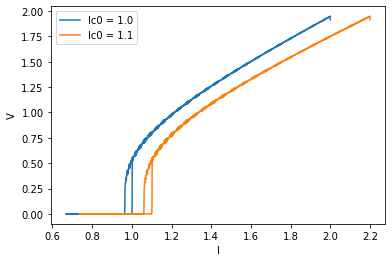

In [7]:
for Ic0 in np.arange(1.0, 1.1, 0.1):
    tlist = np.arange(0, 100, 0.1)
    vlist = []
    ilist = []
    Q = 1
    start = [0.0, 0.0]
    for alp in cycle:
        I = Ic0/alp
        paramlist = [I, Ic0, Q]
        d = DiffEq(junction, tlist, list(start), paramlist)
        y = d.runge_kutta()
        start = y[-1]
        v = np.average(y[:, 0])
        vlist.append(v)
        ilist.append(I)
    plt.plot(ilist, vlist, label=f"Ic0 = {Ic0}")
    
plt.xlabel("I")
plt.ylabel("V")
plt.legend()
plt.show()

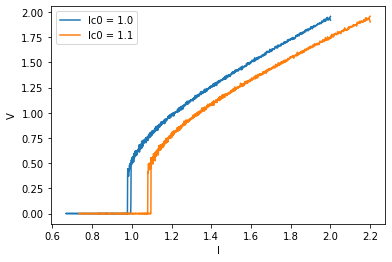

In [8]:
for Ic0 in np.arange(1.0, 1.1, 0.1):
    tlist = np.arange(0, 100, 0.1)
    vlist = []
    ilist = []
    Q = 1
    start = [0.0, 0.0]
    for alp in cycle:
        I = Ic0/alp
        paramlist = [I, Ic0, Q]
        d = DiffEq(noisy, tlist, list(start), paramlist)
        y = d.runge_kutta()
        start = y[-1]
        v = np.average(y[:, 0])
        vlist.append(v)
        ilist.append(I)
    plt.plot(ilist, vlist, label=f"Ic0 = {Ic0}")
    
plt.xlabel("I")
plt.ylabel("V")
plt.legend()
plt.show()

In [1]:
from LibPython.Library import Random

In [2]:
r = Random()

In [3]:
r.mlcg()

0.12407934944400144

In [8]:
nor = []
for i in range(int(1e5)):
    nor.append(r.mlcg())

(array([ 9990., 10011.,  9984.,  9982., 10012., 10024.,  9978., 10010.,
         9994., 10015.]),
 array([6.10463342e-05, 1.00048837e-01, 2.00036628e-01, 3.00024419e-01,
        4.00012209e-01, 5.00000000e-01, 5.99987791e-01, 6.99975581e-01,
        7.99963372e-01, 8.99951163e-01, 9.99938954e-01]),
 <BarContainer object of 10 artists>)

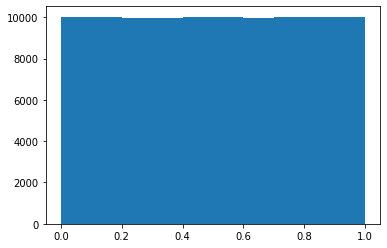

In [9]:
import matplotlib.pyplot as plt
plt.hist(nor)
# print(nor)